<h1><center><font style='color:Gray' >CAB INVESTMENT DATA ANALYSIS</font></center></h1>


**Mha Luqman** - - mahasa179@gmail.com

<hr><hr>

<div style="background-color:lightyellow; padding : 15px"><h2>Objective:</h2>

**XYZ** a private firm in USA is try to invest in a Cab Company. They palnning to understand the market before taking final decision. Data sets have been provided contains information of 2 cab companies **“Pink Company”** and **“Yellow Company”** from 2016-2018.

In [186]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import datetime
from scipy import stats


/kaggle/input/cab-data/Cab_Data.csv
/kaggle/input/cab-data/City.csv
/kaggle/input/cab-data/README.md
/kaggle/input/cab-data/Customer_ID.csv
/kaggle/input/cab-data/Transaction_ID.csv


<div style="background-color:lightyellow; padding : 15px"><h2>Loading Files:</h2>

In [187]:
customer = pd.read_csv("../input/cab-data/Customer_ID.csv")
city= pd.read_csv('../input/cab-data/City.csv')
cab= pd.read_csv('../input/cab-data/Cab_Data.csv')
transaction = pd.read_csv('../input/cab-data/Transaction_ID.csv')


*Explore Data*

In [188]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [189]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [190]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [191]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


*Cleaning Data and Oragnaizing*

In [192]:
transaction.sort_values(by=['Customer ID'],inplace=True)
customer.sort_values(by=['Customer ID'],inplace=True)

In [193]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
7098,1,Male,36,16359
8267,2,Male,31,12069
9331,3,Female,27,12968
3511,4,Male,33,13803
10897,5,Male,24,9965


In [194]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
292523,10292534,1,Card
241354,10241365,1,Cash
74079,10074090,1,Cash
251185,10251196,1,Card
8423,10008434,1,Cash


<hr>

In [195]:
transaction2 = pd.merge(transaction,customer)
transaction2 = transaction2.dropna()
transaction2.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10292534,1,Card,Male,36,16359
1,10241365,1,Cash,Male,36,16359
2,10074090,1,Cash,Male,36,16359
3,10251196,1,Card,Male,36,16359
4,10008434,1,Cash,Male,36,16359


*Merge transaction2 with Cab data to determine correlation between number of transaction and cab companies*

In [196]:
all_data = pd.merge(cab,transaction2)
all_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423



*We create a 4 new features: Number of transactions for each customer, Profits, number of cash transactions, number of card transactions.*

In [197]:
all_data_copy = all_data.copy() 

for index, row in all_data.iterrows():
    pay_mode = row['Payment_Mode'] 
    all_data_copy.at[index,pay_mode] = 1  
all_data_copy.fillna(0,inplace=True) 
all_data_copy.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Card,Cash
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,1.0,0.0
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,1.0,0.0
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,0.0,1.0
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,0.0,1.0
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,1.0,0.0


<hr>


<div style="background-color:lightyellow; padding : 15px"><h2>New dataframe to determine number of payments by card or cash for each customers and calculate number of transactions for all of customers</h2>


In [198]:
#new data frame to detrmine payment modes for all customers and number of payment modes used each time.
payment_mode = all_data_copy.groupby('Customer ID', sort=True, as_index=False)[['Card','Cash']].sum()

payment_mode ['Transactions Per Customer'] = payment_mode ['Card']+payment_mode ['Cash']

payment_mode


,Customer ID,Card,Cash,Transactions Per Customer
0,1,18.0,11.0,29.0
1,2,25.0,15.0,40.0
2,3,30.0,16.0,46.0
3,4,17.0,9.0,26.0
4,5,20.0,11.0,31.0
...,...,...,...,...
46143,59996,2.0,2.0,4.0
46144,59997,6.0,4.0,10.0
46145,59998,5.0,4.0,9.0
46146,59999,4.0,4.0,8.0


*Merge Payment Mode featrues*

In [199]:
all_data2 = pd.merge(all_data,payment_mode)
all_data2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Card,Cash,Transactions Per Customer
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,2.0,1.0,3.0
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,2.0,1.0,3.0
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,2.0,1.0,3.0
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,3.0,1.0,4.0
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,3.0,1.0,4.0


*Add Profit feature*

In [200]:
all_data2['Profit'] = all_data2['Price Charged'] - all_data2['Cost of Trip'] 
all_data2

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Card,Cash,Transactions Per Customer,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,2.0,1.0,3.0,57.3150
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,2.0,1.0,3.0,281.2772
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,2.0,1.0,3.0,194.6480
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,3.0,1.0,4.0,23.6660
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,3.0,1.0,4.0,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42,19417,1.0,0.0,1.0,47.2656
359388,10439799,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713,0.0,1.0,1.0,105.0980
359389,10439838,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960,1.0,0.0,1.0,71.2100
359390,10439840,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454,0.0,1.0,1.0,21.8600


*Merge City file to pervious data frame*

In [201]:
all_data3 = pd.merge(all_data2,city)
all_data3.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Card,Cash,Transactions Per Customer,Profit,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,2.0,1.0,3.0,57.3150,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,2.0,1.0,3.0,281.2772,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,2.0,1.0,3.0,194.6480,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,3.0,1.0,4.0,23.6660,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,3.0,1.0,4.0,253.9808,"814,885","24,701"


In [202]:


all_data3

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Card,Cash,Transactions Per Customer,Profit,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,2.0,1.0,3.0,57.3150,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,2.0,1.0,3.0,281.2772,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,2.0,1.0,3.0,194.6480,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,3.0,1.0,4.0,23.6660,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,3.0,1.0,4.0,253.9808,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,2.0,4.0,6.0,143.6180,"418,859","127,001"
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,2.0,4.0,6.0,23.0464,"418,859","127,001"
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,2.0,4.0,6.0,-5.8540,"418,859","127,001"
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,2.0,4.0,6.0,-6.0900,"418,859","127,001"


In [203]:
all_data3[['KM Travelled','Profit','Age','Income (USD/Month)']].describe()

,KM Travelled,Profit,Age,Income (USD/Month)
count,359392.000000,359392.000000,359392.000000,359392.000000
mean,22.567254,137.253198,35.336705,15048.822937
std,12.233526,160.311840,12.594234,7969.409482
min,1.900000,-220.060000,18.000000,2000.000000
25%,12.000000,28.012000,25.000000,8424.000000
50%,22.440000,81.962000,33.000000,14685.000000
75%,32.960000,190.030000,42.000000,21035.000000
max,48.000000,1463.966000,65.000000,35000.000000


*Date of Travel Conversion*

In [204]:
all_data3.sort_values( by = ['Date of Travel'],inplace=True) 
all_data3.reset_index(drop=True,inplace=True) #reset index acording to date

min_d = all_data3['Date of Travel'].min() # min date
all_data3['Date of Travel'] = all_data3['Date of Travel'] - min_d # Start date from 0 

day1 = datetime.date(2016,1,1) # First day of 2016
day1 = pd.Timestamp(day1) # Creat Timestamp
deltas = pd.to_timedelta(all_data3['Date of Travel'],unit='D') # Change values to days format
days_format = day1+deltas # Add delta days to the 1/1/2016


all_data3['Date of Travel'] = pd.Series(pd.DatetimeIndex(days_format).year) # Create column of years(Only relevant information)
all_data3['Month'] = pd.Series(pd.DatetimeIndex(days_format).month) # Month from jan to dec
all_data3['Day'] = pd.Series(pd.DatetimeIndex(days_format).day) # Days from 1 to 30
all_data3['Day of Week'] = pd.Series(pd.DatetimeIndex(days_format).dayofweek) # Day of week from 0 to 6
all_data3['Week'] = pd.Series(pd.DatetimeIndex(days_format).week) # Week of year 1 to 52 or 53
all_data3['Date'] = pd.Series(pd.DatetimeIndex(days_format)) # Save a column of the full date
all_data3

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,Cash,Transactions Per Customer,Profit,Population,Users,Month,Day,Day of Week,Week,Date
0,10000429,2016,Yellow Cab,BOSTON MA,15.15,342.62,205.4340,57474,Card,Male,...,3.0,13.0,137.1860,"248,968","80,021",1,1,4,53,2016-01-01
1,10000525,2016,Yellow Cab,CHICAGO IL,2.18,51.47,26.4216,4551,Cash,Male,...,4.0,16.0,25.0484,"1,955,130","164,468",1,1,4,53,2016-01-01
2,10001234,2016,Yellow Cab,SEATTLE WA,39.60,1119.67,541.7280,38146,Cash,Male,...,1.0,1.0,577.9420,"671,238","25,063",1,1,4,53,2016-01-01
3,10001311,2016,Yellow Cab,WASHINGTON DC,34.65,707.94,474.0120,53048,Card,Male,...,6.0,20.0,233.9280,"418,859","127,001",1,1,4,53,2016-01-01
4,10000927,2016,Yellow Cab,NEW YORK NY,34.56,1121.11,485.2224,1808,Cash,Male,...,16.0,34.0,635.8876,"8,405,837","302,149",1,1,4,53,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10436500,2018,Yellow Cab,WASHINGTON DC,11.00,166.49,132.0000,53140,Card,Female,...,10.0,24.0,34.4900,"418,859","127,001",12,30,6,52,2018-12-30
359388,10433435,2018,Pink Cab,MIAMI FL,2.30,29.53,23.9200,9774,Cash,Female,...,2.0,2.0,5.6100,"1,339,155","17,675",12,30,6,52,2018-12-30
359389,10436696,2018,Pink Cab,BOSTON MA,27.55,377.85,330.6000,60000,Cash,Female,...,9.0,18.0,47.2500,"248,968","80,021",12,30,6,52,2018-12-30
359390,10433418,2018,Pink Cab,LOS ANGELES CA,2.34,29.21,25.0380,7650,Card,Female,...,10.0,20.0,4.1720,"1,595,037","144,132",12,30,6,52,2018-12-30


<hr>

***Cleaning data set by removing unneeded columns.***

In [205]:
del all_data3['Payment_Mode']
del all_data3['Price Charged']
del all_data3['Cost of Trip']
del all_data3['Month']
del all_data3['Day']
del all_data3['Day of Week']
del all_data3['Week']
del all_data3['Date']
all_data3

,Transaction ID,Date of Travel,Company,City,KM Travelled,Customer ID,Gender,Age,Income (USD/Month),Card,Cash,Transactions Per Customer,Profit,Population,Users
0,10000429,2016,Yellow Cab,BOSTON MA,15.15,57474,Male,34,16558,10.0,3.0,13.0,137.1860,"248,968","80,021"
1,10000525,2016,Yellow Cab,CHICAGO IL,2.18,4551,Male,19,6316,12.0,4.0,16.0,25.0484,"1,955,130","164,468"
2,10001234,2016,Yellow Cab,SEATTLE WA,39.60,38146,Male,36,6577,0.0,1.0,1.0,577.9420,"671,238","25,063"
3,10001311,2016,Yellow Cab,WASHINGTON DC,34.65,53048,Male,23,31566,14.0,6.0,20.0,233.9280,"418,859","127,001"
4,10000927,2016,Yellow Cab,NEW YORK NY,34.56,1808,Male,59,18999,18.0,16.0,34.0,635.8876,"8,405,837","302,149"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10436500,2018,Yellow Cab,WASHINGTON DC,11.00,53140,Female,40,7870,14.0,10.0,24.0,34.4900,"418,859","127,001"
359388,10433435,2018,Pink Cab,MIAMI FL,2.30,9774,Female,33,14322,0.0,2.0,2.0,5.6100,"1,339,155","17,675"
359389,10436696,2018,Pink Cab,BOSTON MA,27.55,60000,Female,27,20303,9.0,9.0,18.0,47.2500,"248,968","80,021"
359390,10433418,2018,Pink Cab,LOS ANGELES CA,2.34,7650,Female,32,17629,10.0,10.0,20.0,4.1720,"1,595,037","144,132"


In [206]:
all_data3.isnull().sum()

Transaction ID               0
Date of Travel               0
Company                      0
City                         0
KM Travelled                 0
Customer ID                  0
Gender                       0
Age                          0
Income (USD/Month)           0
Card                         0
Cash                         0
Transactions Per Customer    0
Profit                       0
Population                   0
Users                        0
dtype: int64

<hr>

<div style="background-color:lightyellow; padding : 15px"><h2>Hypothesis Testing</h2>

##           Check if Profit is demand on Age.

<h6><i style="color:red">~ H0:</i> There is  correlation between Profit and Age preference</h6>
<h6><i style="color:red">~ HA:</i> There is no correlation between Profit and Age preference</h6>


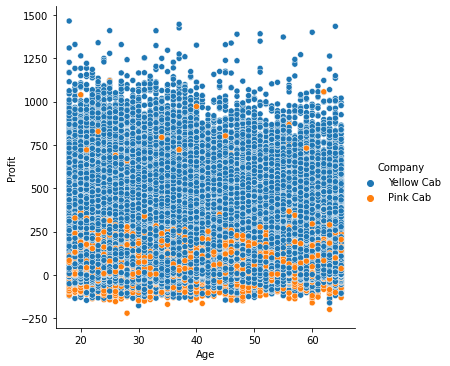

In [207]:
sns.relplot(x='Age', y='Profit', hue='Company',data=df)

<div style="background-color:lightyellow; padding : 15px"><h2> Demand of Gain Information Test which demand on larger correlation ,the suggested company is "Yellow"</h2>

<hr>

##           Check which company get more profits.

<h6><i style="color:red">~ H0:</i> There is  correlation between Company and Profit preference</h6>
<h6><i style="color:red">~ HA:</i> There is no correlation between Company and Profit  preference</h6>


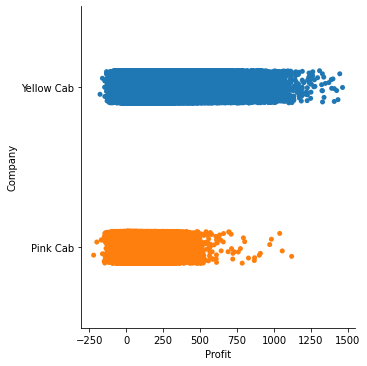

In [208]:
 sns.catplot(x='Profit',y='Company', kind='strip',data=df)

<hr>

<AxesSubplot:xlabel='Company', ylabel='Profit'>

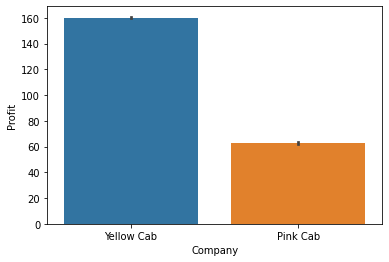

In [209]:
sns.barplot(x=df['Company'], y=df['Profit'], data=df )

<div style="background-color:lightyellow; padding : 15px"><h2> Demand of Gain Information Test which demand on larger correlation ,the suggested company is "Yellow"</h2>

<hr>

##           Check which company get more profits when gender differ.

<h6><i style="color:red">~ H0:</i> There is  correlation between Company and Profit demand on Gender</h6>
<h6><i style="color:red">~ HA:</i> There is no correlation between Company and Profit demand on Gender</h6>

<AxesSubplot:xlabel='Gender', ylabel='Profit'>

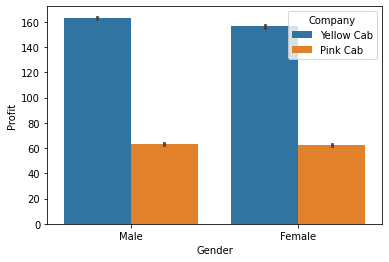

In [210]:
sns.barplot(x=df['Gender'], y=df['Profit'],hue=df['Company'], data=df )

<div style="background-color:lightyellow; padding : 15px"><h2> Demand of Gain Information Test which demand on larger correlation ,the suggested company is "Yellow"</h2>

<hr>

<hr>

##           Cash payment and Comapny.

<h6><i style="color:red">~ H0:</i> There is  correlation between Company and Cash Payment</h6>
<h6><i style="color:red">~ HA:</i> There is no correlation between Company and Company and Cash Payment</h6>

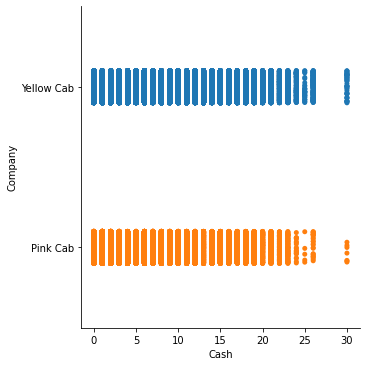

In [212]:
 sns.catplot(x='Cash',y='Company', kind='strip',data=df)

<div style="background-color:lightyellow; padding : 15px"><h2> Demand of Gain Information Test which demand on larger correlation ,the suggested company is "Yellow"</h2>

<hr>

##           Card payment and Comapny.

<h6><i style="color:red">~ H0:</i> There is  correlation between Company and Card Payment</h6>
<h6><i style="color:red">~ HA:</i> There is no correlation between Company and Company and Card Payment</h6>

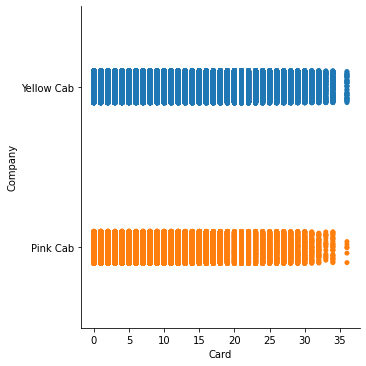

In [213]:
 sns.catplot(x='Card',y='Company', kind='strip',data=df)

<div style="background-color:lightyellow; padding : 15px"><h2> Demand of Gain Information Test which demand on larger correlation ,the suggested company is "Yellow"</h2>

#  KM Travelled 
 <h6><i style="color:red">~ H0:</i> There is  correlation between Company and KM Travelled</h6>
<h6><i style="color:red">~ HA:</i> There is no correlation between Company and KM Travelled</h6>

<AxesSubplot:xlabel='KM Travelled', ylabel='Company'>

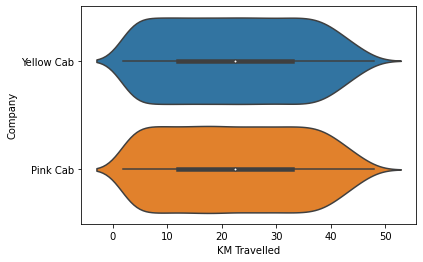

In [217]:
sns.violinplot(x="KM Travelled", y="Company",data=df,bw=.2)

<h1><center><font color = 'lightgray',size = 12>EDA RECOMMENDATIONS</center></h1>

1. Yellow Cab company is less risky to invest as they have successfully attracted the customers and Yellow cabs seem to be more common to users.
2. Pink cab company is a startup.
3. However Pink Company and Yellow Company distance traveled is approximately the same.

In [218]:
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Customer ID,Gender,Age,Income (USD/Month),Card,Cash,Transactions Per Customer,Profit,Population,Users,Month,Day,Day of Week,Week,Date
0,10000429,2016,Yellow Cab,BOSTON MA,15.15,57474,Male,34,16558,10.0,3.0,13.0,137.1860,"248,968","80,021",1,1,4,53,2016-01-01
1,10000525,2016,Yellow Cab,CHICAGO IL,2.18,4551,Male,19,6316,12.0,4.0,16.0,25.0484,"1,955,130","164,468",1,1,4,53,2016-01-01
2,10001234,2016,Yellow Cab,SEATTLE WA,39.60,38146,Male,36,6577,0.0,1.0,1.0,577.9420,"671,238","25,063",1,1,4,53,2016-01-01
3,10001311,2016,Yellow Cab,WASHINGTON DC,34.65,53048,Male,23,31566,14.0,6.0,20.0,233.9280,"418,859","127,001",1,1,4,53,2016-01-01
4,10000927,2016,Yellow Cab,NEW YORK NY,34.56,1808,Male,59,18999,18.0,16.0,34.0,635.8876,"8,405,837","302,149",1,1,4,53,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10436500,2018,Yellow Cab,WASHINGTON DC,11.00,53140,Female,40,7870,14.0,10.0,24.0,34.4900,"418,859","127,001",12,30,6,52,2018-12-30
359388,10433435,2018,Pink Cab,MIAMI FL,2.30,9774,Female,33,14322,0.0,2.0,2.0,5.6100,"1,339,155","17,675",12,30,6,52,2018-12-30
359389,10436696,2018,Pink Cab,BOSTON MA,27.55,60000,Female,27,20303,9.0,9.0,18.0,47.2500,"248,968","80,021",12,30,6,52,2018-12-30
359390,10433418,2018,Pink Cab,LOS ANGELES CA,2.34,7650,Female,32,17629,10.0,10.0,20.0,4.1720,"1,595,037","144,132",12,30,6,52,2018-12-30
